In [245]:
import re
import requests
import seaborn as sns
import pandas as pd

# 1

### Извлекаем из файла ftp ссылки и записываем их в файл ftps

In [246]:
response = requests.get("https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/references")
data = response.text

In [268]:
pattern = r"ftp\.[^;\s]*"
string = data

result = re.findall(pattern, string)
result = list(sorted(set(result)))

In [248]:
with open("ftps", "w") as ftp_file:
    for line in result:
        ftp_file.write(f"{line}\n")

# 2

### Извлекаем из рассказа все числа

In [249]:
story_link = requests.get("https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/2430AD")
story = story_link.text

In [251]:
pattern = r"\d+\.*\d+"
string = story

result_story = re.findall(pattern, string)

In [252]:
print(result_story)

['2430', '1969', '2430', '2430', '57', '57', '1970', '3.68', '35', '460', '2430']


# 3

### Извлекаем из рассказа все слова, где есть буква "а" (регистр не важен)

In [253]:
pattern = r"\w*[aA]\w*"
string = story

result_story_a = re.findall(pattern, string)

In [254]:
print(result_story_a)

['A', 'and', 'dawn', 'and', 'all', 'ache', 'have', 'a', 'nightmare', 'a', 'are', 'all', 'and', 'a', 'gleam', 'anywhere', 'an', 'original', 'a', 'personality', 'packed', 'talk', 'said', 'Alvarez', 'said', 'Social', 'eventually', 'An', 'character', 'escaped', 'adjustment', 'talking', 'irritates', 'past', 'tact', 'along', 'Trail', 'was', 'as', 'always', 'sparsely', 'have', 'taken', 'and', 'Alvarez', 'walking', 'Alvarez', 'was', 'tall', 'and', 'rather', 'athletic', 'a', 'muscular', 'activities', 'stairs', 'and', 'rampways', 'instance', 'almost', 'an', 'character', 'and', 'avoided', 'sunlamps', 'and', 'was', 'pale', 'said', 'want', 'can', 'have', 'square', 'space', 'and', 'has', 'apartment', 'Rather', 'a', 'a', 'way', 'said', 'Alvarez', 'And', 'a', 'Alvarez', 'added', 'matter', 'reach', 'peak', 'reach', 'reach', 'goal', 'All', 'mankind', 'And', 'said', 'at', 'that', 'way', 'that', 'against', 'plastic', 'passed', 'and', 'saw', 'distance', 'was', 'a', 'plankton', 'varieties', 'almost', 'that'

# 4

### Извлекаем из рассказа восклицательные предложения

In [255]:
pattern = r"[^.\"]*!"
string = story

result_story_exc = re.findall(pattern, string)

In [256]:
print(result_story_exc)

['Yes!', 'Literally!', ' There was once a time! Centuries ago!', 'Think, Cranwitz!', 'If we succeed!']


# 5

In [269]:
pattern = r"\w+'\w+|\w+"
string = story

result_story_hist = re.findall(pattern, string)

### Отбираем только уникальные слова и числа

In [258]:
new_result = []
for i in result_story_hist:
    i = i.lower()
    new_result.append(i)
new_result = set(new_result)

### Делаем массив с длинами уникальных слов

In [259]:
len_result = []
for i in new_result:
    len_i = len(i)
    len_result.append(len_i)

In [260]:
print(new_result)

{'steady', 'asked', 'men', 'york', 'activities', "i've", 'newton', 'giant', 'is', 'calories', 'evolution', 'eyes', 'regulated', 'future', 'everything', 'word', 'two', 'prolific', 'dreamed', 'odd', 'twentieth', 'placid', "we've", 'sullen', 'up', 'show', 'really', 'species', 'dry', 'ground', 'blade', 'the', 'zoo', 'millions', 'uniformity', 'necessity', 'after', 'someday', 'end', 'heat', 'many', 'unallayed', 'books', 'having', 'either', 'should', 'energy', 'death', 'cold', 'pure', 'advance', 'hold', 'combination', 'brightened', 'madness', 'else', "other's", 'scientific', 'dried', 'system', 'humanity', 'peacefully', 'numbered', 'quite', 'shall', 'wants', 'world', 'billion', 'science', 'd', 'that', 'talked', 'birds', 'left', "there's", '35', 'stand', 'idea', 'longer', 'variety', 'passed', 'tell', 'talk', 'wore', "they're", 'measure', "they'll", 'time', 'force', 'sunlamps', 'population', 'clear', 'evaluate', 'does', 'maintained', 'something', 'animals', 'engineering', 'escaped', 'cells', 'su

In [261]:
print(len_result)

[6, 5, 3, 4, 10, 4, 6, 5, 2, 8, 9, 4, 9, 6, 10, 4, 3, 8, 7, 3, 9, 6, 5, 6, 2, 4, 6, 7, 3, 6, 5, 3, 3, 8, 10, 9, 5, 7, 3, 4, 4, 9, 5, 6, 6, 6, 6, 5, 4, 4, 7, 4, 11, 10, 7, 4, 7, 10, 5, 6, 8, 10, 8, 5, 5, 5, 5, 7, 7, 1, 4, 6, 5, 4, 7, 2, 5, 4, 6, 7, 6, 4, 4, 4, 7, 7, 7, 4, 5, 8, 10, 5, 8, 4, 10, 9, 7, 11, 7, 5, 10, 9, 8, 11, 7, 5, 5, 6, 6, 7, 9, 9, 5, 5, 4, 7, 7, 9, 4, 7, 6, 7, 5, 10, 8, 1, 4, 4, 7, 6, 5, 3, 8, 3, 7, 4, 7, 4, 7, 7, 6, 9, 5, 8, 5, 9, 4, 4, 6, 6, 4, 6, 4, 4, 7, 6, 6, 5, 8, 6, 6, 9, 3, 5, 5, 5, 8, 4, 3, 5, 7, 8, 4, 2, 4, 5, 7, 5, 6, 4, 8, 10, 8, 9, 5, 6, 8, 6, 5, 6, 7, 6, 11, 5, 3, 7, 5, 4, 4, 3, 11, 3, 8, 7, 7, 6, 6, 6, 8, 8, 7, 4, 4, 5, 4, 2, 15, 12, 7, 6, 2, 8, 9, 3, 4, 9, 11, 5, 4, 4, 2, 5, 3, 4, 2, 5, 7, 3, 10, 8, 6, 6, 5, 3, 8, 6, 10, 4, 8, 13, 6, 9, 8, 6, 4, 7, 2, 7, 8, 4, 8, 5, 7, 11, 6, 5, 2, 4, 7, 10, 8, 7, 5, 6, 5, 2, 5, 7, 9, 4, 3, 4, 4, 7, 9, 6, 5, 2, 6, 5, 7, 6, 7, 6, 2, 4, 9, 6, 4, 4, 4, 4, 8, 5, 9, 4, 2, 9, 3, 4, 3, 6, 11, 3, 5, 9, 9, 3, 4, 4, 8, 3, 8, 3, 5,

In [262]:
set_len = set(len_result)
list_len = []
for i in set_len:
    cnt = len_result.count(i)
    list_len.append(cnt)


In [263]:
sum_len = sum(list_len)
part_list = []

for i in list_len:
    part = i/sum_len
    part = round(part, 3)
    part_list.append(part)


### Создаем датафрейм с длинами слов, их количеством и долей

In [264]:
len_df = pd.DataFrame(list(zip(list(set_len), list_len, part_list)), columns = ['Word length', 'Values', 'Part'])
len_df

,Word length,Values,Part
0,1,6,0.006
1,2,27,0.029
2,3,74,0.079
3,4,166,0.177
4,5,146,0.155
5,6,143,0.152
6,7,135,0.144
7,8,102,0.109
8,9,66,0.070
9,10,36,0.038


### Строим barplot 

<AxesSubplot: xlabel='Word length', ylabel='Part'>

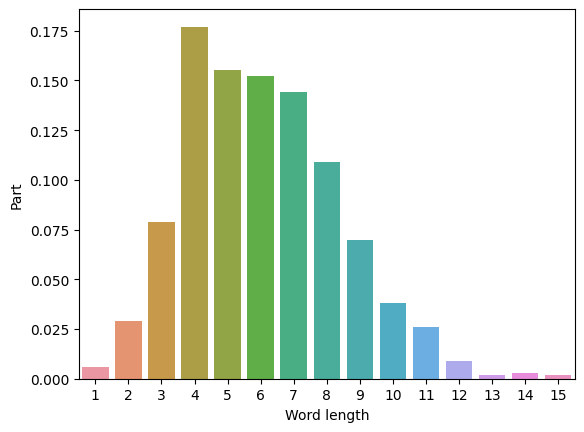

In [265]:
sns.barplot(data = len_df, x = 'Word length', y = 'Part')

# 6

### Функция для перевода с русского языка на "кирпичный" язык

In [266]:
def rus_to_brick(string):
    
    # Отбираем слова из текста
    pattern_1 = r"\w+"
    string_1 = 'Введите строку на русском языке для перевода'
    result_translate = re.findall(pattern_1, string_1)
    
    # Функция для наждения значения по ключу (значение match_obj) в объявленном словаре
    def my_match(match_obj):
        dict_translate = {
        'а':'КА',
        'у':'КУ',
        'о':'КО',
        'е':'КЕ',
        'и':'КИ',
        'я':'КЯ',
        'ю':'КЮ',
        'ё':'КЁ',
        'э':'КЭ',
        'ы':'КЫ',
        }
        return match_obj.group(0) + dict_translate.get(match_obj.group(0), "")
    
    # Отбираем гласные буквы в словах и ставим после них значения словаря по ключу
    pattern_2 = r"([ауоеияюёэы])"
    result_vowel = []

    for s in result_translate:
        vowel = re.sub(pattern_2, my_match, s)
        result_vowel.append(vowel)
    
    # Записываем результат в строку
    string_result = ''
    for w in result_vowel:
        string_result += w
        string_result += ' '
        
    return string_result

# 7

### Находим в тексте предложения с заданным количеством слов

In [267]:
def extract_n_words(string, count):
    
    pattern = r"[^.]*."
    string = string
    result_1 = re.findall(pattern, string)

    result = ()
    pattern_2 = r"\w+"
    for res in result_1:
        result_2 = re.findall(pattern_2, res)
        if len(result_2) == n:
            result = result + (result_2,)

    return result